PyBaMM can collect usage data and send it to the PyBaMM team to help us improve the software.
We do not collect any sensitive information such as models, parameters, or simulation results - only information on which parts of the code are being used and how frequently.
This is entirely optional and does not impact the functionality of PyBaMM.
For more information, see https://docs.pybamm.org/en/latest/source/user_guide/index.html#telemetry

Timeout reached. Defaulting to not enabling telemetry.


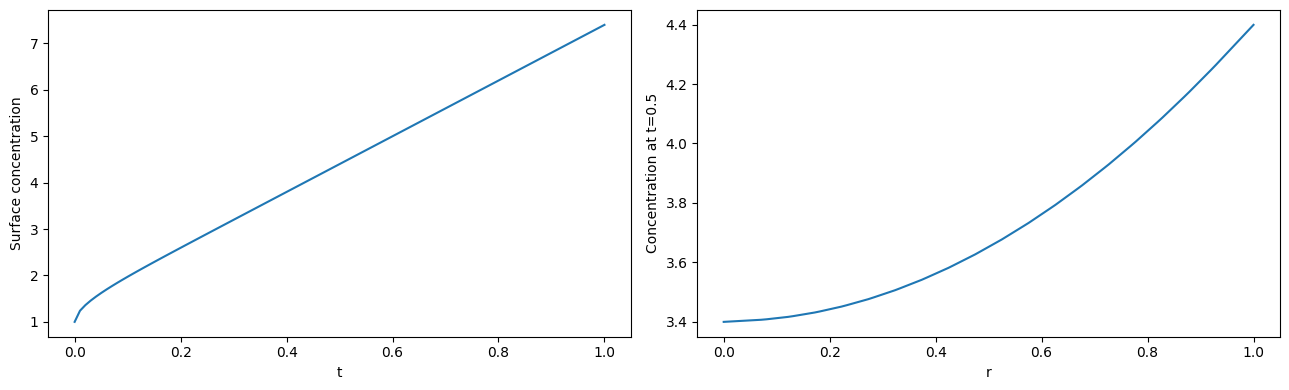

In [1]:
import pybamm
import numpy as np
import matplotlib.pyplot as plt
model = pybamm.BaseModel()

c = pybamm.Variable("Concentration", domain="negative particle")
N = -pybamm.grad(c)  # define the flux
dcdt = -pybamm.div(N)  # define the rhs equation

model.rhs = {c: dcdt}  # add the equation to rhs dictionary
# initial conditions
model.initial_conditions = {c: pybamm.Scalar(1)}

# boundary conditions
lbc = pybamm.Scalar(0)
rbc = pybamm.Scalar(2)
model.boundary_conditions = {c: {"left": (lbc, "Neumann"), "right": (rbc, "Neumann")}}
model.variables = {"Concentration": c, "Flux": N}
"""model.variables defines quantities we want to observe or extract from the simulation."""
# define geometry
r = pybamm.SpatialVariable(
    "r", domain=["negative particle"], coord_sys="spherical polar"
)
geometry = {
    "negative particle": {r: {"min": pybamm.Scalar(0), "max": pybamm.Scalar(1)}}
}
# mesh and discretise
submesh_types = {"negative particle": pybamm.Uniform1DSubMesh}
var_pts = {r: 20}
mesh = pybamm.Mesh(geometry, submesh_types, var_pts)
spatial_methods = {"negative particle": pybamm.FiniteVolume()}
disc = pybamm.Discretisation(mesh, spatial_methods)
disc.process_model(model);
# solve
solver = pybamm.ScipySolver()
t = np.linspace(0, 1, 100)
solution = solver.solve(model, t)

# post-process, so that the solution can be called at any time t or space r
# (using interpolation)
c = solution["Concentration"]

# plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))

ax1.plot(solution.t, c(solution.t, r=1))
ax1.set_xlabel("t")
ax1.set_ylabel("Surface concentration")
r = np.linspace(0, 1, 100)
ax2.plot(r, c(t=0.5, r=r))
ax2.set_xlabel("r")
ax2.set_ylabel("Concentration at t=0.5")
plt.tight_layout()
plt.show()